## Using Logistic Regression on the data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the Excel file using pandas

In [5]:
train_set = pd.read_excel("Train_set.xlsx")

In [6]:
train_set.head() # This gives us the first 5 entries of the train set

,S No.,Age,Age(years),Gender(1-M),Height in cm,Weight in kg,Cholesterol,Glucose,Smoke,Alcohol,Active,Health risk (1=High),BMI,"Status(1 = N, 2 = Owt)"
0,1,18393,50.391781,2,168,62,1,1,0,0,1,0,NaN,NaN
1,2,20228,55.419178,1,156,85,3,1,0,0,1,1,NaN,NaN
2,3,18857,51.663014,1,165,64,3,1,0,0,0,1,NaN,NaN
3,4,17623,48.282192,2,169,82,1,1,0,0,1,1,NaN,NaN
4,5,17474,47.873973,1,156,56,1,1,0,0,0,0,NaN,NaN


## Finding important features using Visualisation

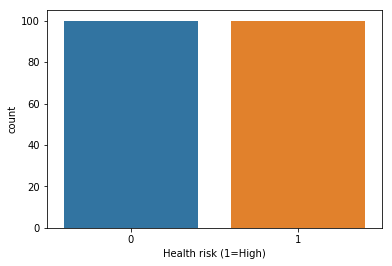

In [7]:
sns.countplot(x= train_set['Health risk (1=High)'], data= train_set)

In [13]:
train_set.groupby('Gender(1-M)').count()

,S No.,Age,Age(years),Height in cm,Weight in kg,Cholesterol,Glucose,Smoke,Alcohol,Active,Health risk (1=High),BMI,"Status(1 = N, 2 = Owt)"
Gender(1-M),,,,,,,,,,,,,
1,118,118,118,118,118,118,118,118,118,118,118,0,0
2,82,82,82,82,82,82,82,82,82,82,82,0,0


#### We can see that the no. of people with high health risk form 50% of the total data set.

### Ananlysis of Age Groups

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


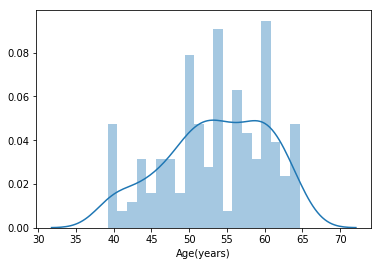

In [87]:
sns.distplot(train_set['Age(years)'], bins= 20, hist=True)

#### Max no. of people belong to the 50-60 age group. Thus age must have a role to play.

## Cholestrol and Health Risk

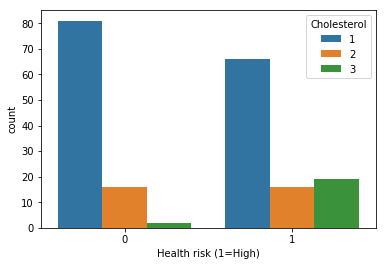

In [88]:
sns.countplot(x= train_set['Health risk (1=High)'], hue= train_set['Cholesterol'])

#### People with high cholestrol values have a higher chance of health risk (green). Thus, cholesterol is important.

## Impact of BMI (UW/OW) on Health Risk 

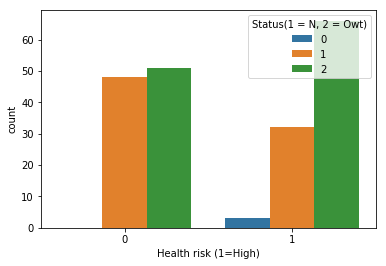

In [89]:
sns.countplot(x= train_set['Health risk (1=High)'], hue= train_set['Status(1 = N, 2 = Owt)'])

#### Underweight people have a 100% chance of high health risk. 
#### Overweight people also have a great chance for health risk.
#### Hence, BMI is an important factor

## Alcohol and Smoking vs Health Risk

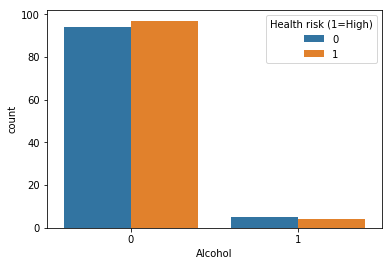

In [90]:
sns.countplot(x= train_set['Alcohol'], hue= train_set['Health risk (1=High)'])

#### As the no. of people consuming alcohol is very low, judging Health risk based on that will be pointless and can be dropped.

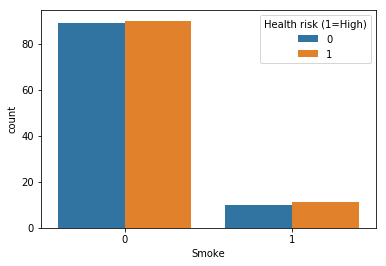

In [91]:
sns.countplot(x= train_set['Smoke'], hue= train_set['Health risk (1=High)'])

#### As the health risk for smokers and non-smokers is almost the same, smoking wouldn't make much difference.
#### Hence it can be dropped.

## Gender vs Health Risk

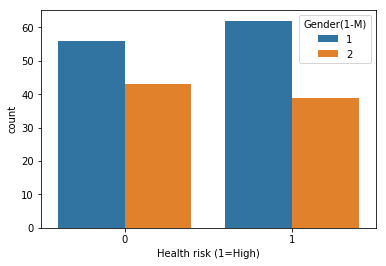

In [92]:
sns.countplot(x= train_set['Health risk (1=High)'], hue= train_set['Gender(1-M)'])

#### Men have a fairly higher risk thus gender can be considered as a feature.

## Removing unnecessary features

In [128]:
train_set.drop(['Alcohol', 'Smoke', 'BMI'], axis=1, inplace = True)

In [129]:
train_set.head()

,S No.,Age,Age(years),Gender(1-M),Height in cm,Weight in kg,Cholesterol,Glucose,Active,Health risk (1=High),"Status(1 = N, 2 = Owt)"
0,1,18393,50.391781,2,168,62,1,1,1,0,1
1,2,20228,55.419178,1,156,85,3,1,1,1,2
2,3,18857,51.663014,1,165,64,3,1,0,1,1
3,4,17623,48.282192,2,169,82,1,1,1,1,2
4,5,17474,47.873973,1,156,56,1,1,0,0,1


## Training the model

In [130]:
X = train_set.drop('Health risk (1=High)', axis = 1)   #X is the set of all features contributing to Health risk

In [131]:
y = train_set['Health risk (1=High)']    #y is the value to be predicted

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y) #splits the training data into train and test data sets

In [134]:
from sklearn.linear_model import LogisticRegression

In [135]:
log_model = LogisticRegression()  #creating an object of the logistic regression model

In [136]:
log_model.fit(X_train, y_train)    #fitting the model to our training set

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [137]:
prediction = log_model.predict(X_test)   #stores y_test predictions 

In [138]:
from sklearn.metrics import classification_report

In [139]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.61      0.90      0.73        21
           1       0.89      0.59      0.71        29

   micro avg       0.72      0.72      0.72        50
   macro avg       0.75      0.75      0.72        50
weighted avg       0.78      0.72      0.72        50



#### precision: TP/TP+FP   i.e. correctly predicted positive upon total predicted positive
#### recall: TP/TP+FN i.e. correctly predicted positive upon all obeservations that are true
#### f1-score: ( 2xRecallxprecision)/ (Recall+ precision)
#### Accuracy = TP+ TN/(TP+TN+FP+FN)

In [141]:
import sklearn
print("The accuracy of the model is",(sklearn.metrics.accuracy_score(y_test, prediction))*100,"%")   #converting accuracy score to %

The accuracy of the model is 72.0 %
